import the packages

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

laod dataset

In [6]:
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 74s 0us/step


In [8]:
train_images.shape

(50000, 32, 32, 3)

In [10]:
32*32*3

3072

In [12]:
train_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

draw images

In [17]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [19]:
len(datasets.cifar10.load_data())

2

In [21]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
len(class_names)

10

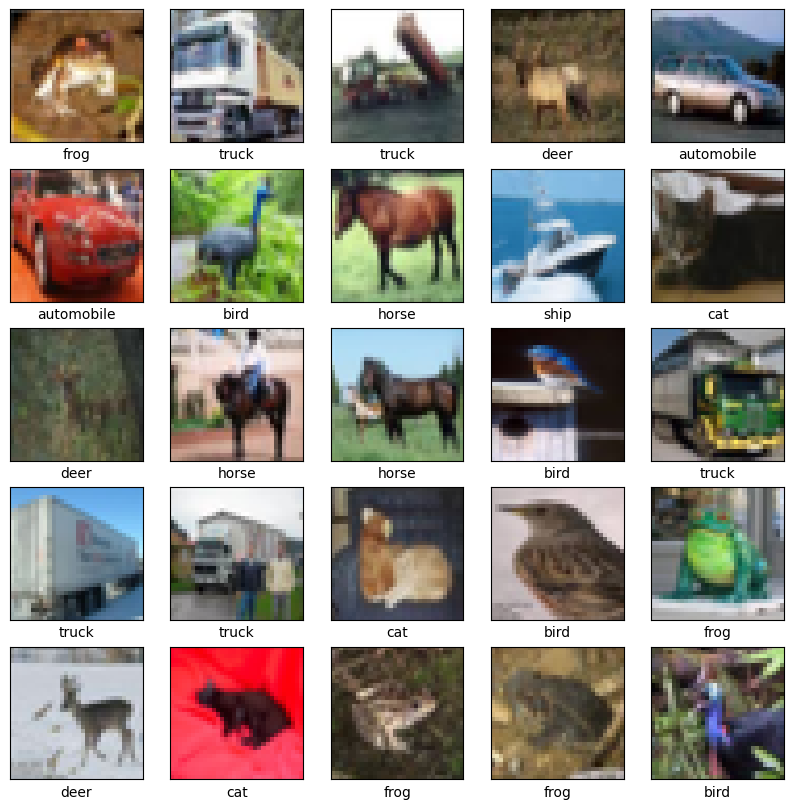

In [23]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

create CNN network

In [36]:
model=models.Sequential()

In [38]:
model.add(layers.Conv2D(32, 
                        (3,3), 
                        activation='relu',
                        input_shape=(32,32,3)
                        ))

model.add(layers.MaxPool2D((2,2)))

In [40]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 896 (3.50 KB)

 Trainable params: 896 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

add dense layers

In [43]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [45]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         460,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 462,410 (1.76 MB)

 Trainable params: 462,410 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

compile the model

In [50]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )

history=model.fit(train_images,train_labels, epochs=10,
                  validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.1433 - loss: 8.4554 - val_accuracy: 0.2789 - val_loss: 1.8766
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.2977 - loss: 1.8261 - val_accuracy: 0.3634 - val_loss: 1.6997
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3943 - loss: 1.6191 - val_accuracy: 0.4134 - val_loss: 1.5666
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4372 - loss: 1.4951 - val_accuracy: 0.4489 - val_loss: 1.5033
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4808 - loss: 1.3866 - val_accuracy: 0.4596 - val_loss: 1.4822
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5194 - loss: 1.2921 - val_accuracy: 0.5049 - val_loss: 1.3736
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5447 - loss: 1.2393 - val_accuracy: 0.4842 - val_loss: 1.4808
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5674 - loss: 1

In [52]:
history.history

{'accuracy': [0.18738000094890594,
  0.31845998764038086,
  0.4006800055503845,
  0.4424999952316284,
  0.48517999053001404,
  0.5200200080871582,
  0.5379400253295898,
  0.561959981918335,
  0.5768399834632874,
  0.5917400121688843],
 'loss': [3.2003231048583984,
  1.789422631263733,
  1.6109437942504883,
  1.4832006692886353,
  1.3812386989593506,
  1.299688458442688,
  1.255449652671814,
  1.2050729990005493,
  1.1608695983886719,
  1.1236900091171265],
 'val_accuracy': [0.27889999747276306,
  0.36340001225471497,
  0.41339999437332153,
  0.4489000141620636,
  0.4596000015735626,
  0.5048999786376953,
  0.48420000076293945,
  0.527400016784668,
  0.536899983882904,
  0.5338000059127808],
 'val_loss': [1.8766062259674072,
  1.699701189994812,
  1.5665630102157593,
  1.5033496618270874,
  1.4821630716323853,
  1.3735698461532593,
  1.4807943105697632,
  1.4044393301010132,
  1.3570632934570312,
  1.3381811380386353]}

313/313 - 1s - 3ms/step - accuracy: 0.5338 - loss: 1.3382


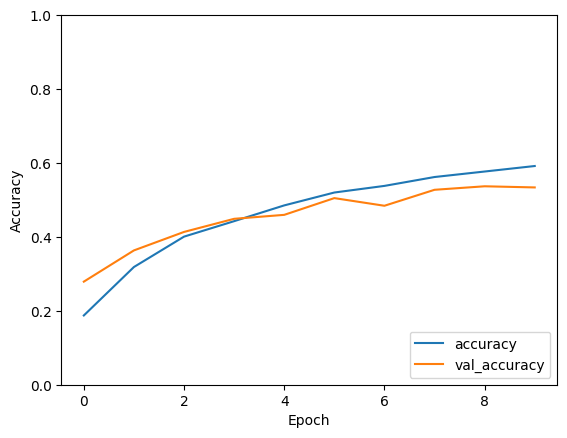

In [62]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
plt.show()

In [64]:
model.weights

[<Variable path=sequential_1/conv2d_1/kernel, shape=(3, 3, 3, 32), dtype=float32, value=[[[[-8.81903991e-02  2.75036186e-01  3.40965576e-02  1.82339132e-01
     -9.23805833e-02  1.88540921e-01 -1.72328964e-01  1.14303514e-01
      5.38657382e-02 -1.72132790e-01  8.57227966e-02  1.36609405e-01
     -1.98109820e-02 -2.86233604e-01  4.56870534e-02 -9.92324948e-02
     -8.69124457e-02 -2.12870106e-01 -1.33192644e-01 -1.12790085e-01
      8.30992535e-02  8.39865953e-02 -1.02741614e-01  9.76615250e-02
     -3.06723099e-02 -2.07904115e-01 -2.17015356e-01  9.35416147e-02
     -4.84219752e-02 -3.72764617e-02  1.49144074e-02 -5.08168079e-02]
    [-3.39098424e-02 -2.73306847e-01  1.03169635e-01  2.78119057e-01
     -1.07755236e-01  2.37967625e-01 -1.17358051e-01 -6.66249841e-02
     -1.30002245e-01 -1.59085095e-01 -5.33745326e-02  8.62977281e-02
     -2.13839397e-01 -1.87773243e-01 -1.46545306e-01 -1.38025641e-01
     -1.03102125e-01 -1.70516312e-01 -4.04790938e-02 -3.75167318e-02
      1.3720794

In [66]:
test_labels.flatten()

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [68]:
import numpy as np 
import pandas as pd
y_pred=model.predict(test_images)
max_prob=[np.max(i) for i in y_pred]
index=[np.argmax(i) for i in y_pred]
prediction_class=[class_names[i] for i in index]
ground_truth_class=[class_names[i] for i in test_labels.flatten()]
d1=pd.DataFrame(zip(max_prob,index,prediction_class,ground_truth_class),
               columns=['Max_proba','Index','Prediction_class','Ground_Truth_Class'])
con=d1['Prediction_class']==d1['Ground_Truth_Class']
d1['output']=np.where(con,1,0)
accuracy=d1['output'].sum()/len(d1['output'])
accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


np.float64(0.5338)

In [70]:
d1

,Max_proba,Index,Prediction_class,Ground_Truth_Class,output
0,11.383024,3,cat,cat,1
1,60.532421,0,airplane,ship,0
2,13.108558,8,ship,ship,1
3,16.565390,0,airplane,airplane,1
4,24.253756,6,frog,frog,1
...,...,...,...,...,...
9995,22.155191,8,ship,ship,1
9996,9.795033,6,frog,cat,0
9997,17.563734,5,dog,dog,1
9998,6.369197,6,frog,automobile,0


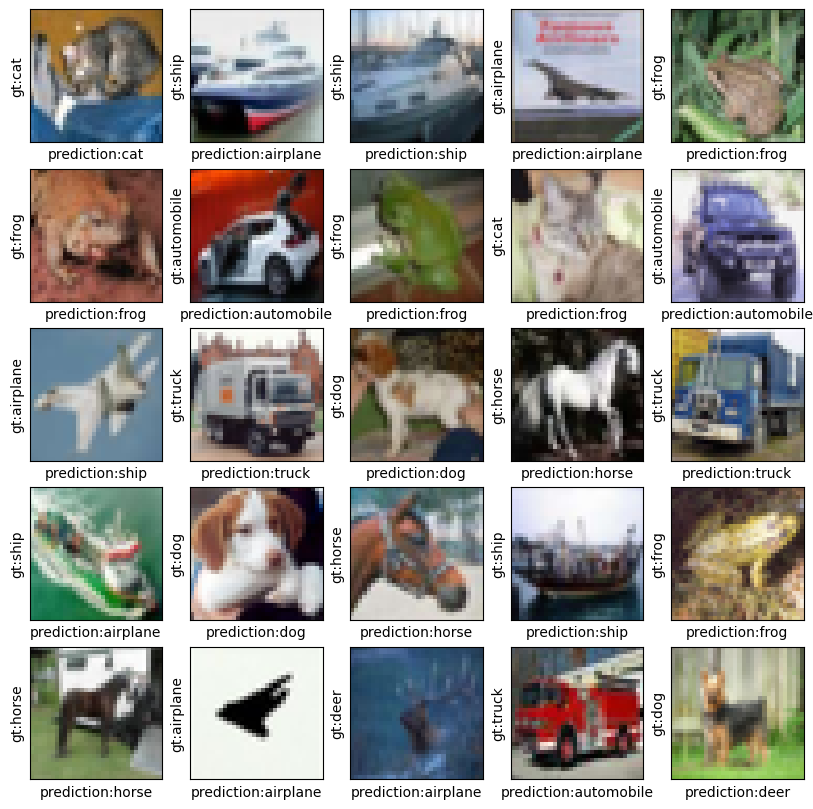

In [72]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.xlabel(f'prediction:{class_names[np.argmax(y_pred[i])]}')
    plt.ylabel(f'gt:{class_names[test_labels.flatten()[i]]}')
plt.show()